<a href="https://colab.research.google.com/github/caleb-stewart/A-Z_Machine-Learning/blob/main/upper_confidence_bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
# Dataset is 10 different ads
# Each row is 1 or 0, yes or no if a user would click on the ad
#   (Obviously a simulation dataset)


## Implementing UCB

In [14]:
import math

d = 10 # number of ads being shown
ads_selected = []
numbers_of_selections = [0] * d
N = 10000 # Total number of users
sums_of_rewards = [0] * d
total_rewards = 0

for i in range(N):
  ad = 0 # We want to select the ad with the highest confidence bound
  max_upper_bound = 0
  for j in range(d):
    if numbers_of_selections[j] > 0: # If the ad has already been selected
      # Find the average reward of the ad up to the current round
      avg_reward = sums_of_rewards[j] / numbers_of_selections[j]

      # Find the confidence interval at the current round
      delta_i = math.sqrt((3/2) * math.log(i + 1) / numbers_of_selections[j])

      # Now we want to find the upper bound
      upper_bound = avg_reward + delta_i

    else: # If the ad has not been selected before

      # Select a fake upper bound, so it can get selected
      upper_bound = math.inf

    # choose which ad has the highes max upper bound
    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad = j

  # Add which ad has the highest upper bound to ads_selected
  ads_selected.append(ad)
  # increment the ad selected by 1
  numbers_of_selections[ad] += 1
  # increment the sum of rewards for the ad with the highest upper bound
  # Add the value from the dataset. In this case it is always 1 (or 0)
  sums_of_rewards[ad] += dataset.values[i, ad]

  # Now increase the number of total_rewards
  total_rewards += dataset.values[i, ad]

## Visualising the results

Text(0, 0.5, 'Num times ad selected')

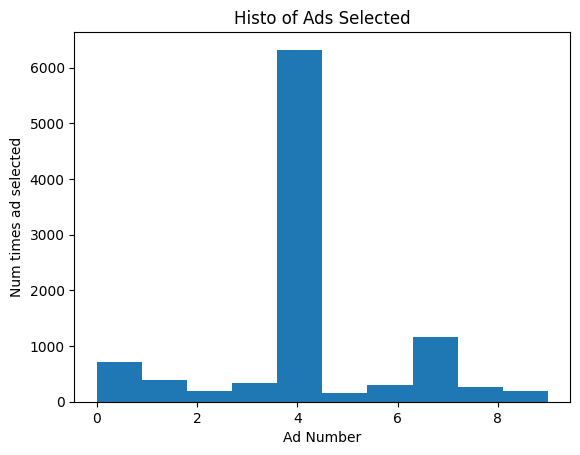

In [15]:
# plot for each of the ads the number of times each ad was selected

plt.hist(ads_selected)
plt.title('Histo of Ads Selected')
plt.xlabel('Ad Number')
plt.ylabel('Num times ad selected')

# We can see that ad 4 was selected the most, at it took about 750-1000 rounds
# to determine ad 4 was the best ad